In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [2]:
#read file for base df from john hopkins
hopkins_df = pd.read_csv("Resources/08-01-2020 covid data.csv")

#display dataframe
hopkins_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-02 04:35:05,32.3182,-86.9023,89349,1603,35401.0,52345.0,1,1822.264508,697371.0,10521.0,1.794088,84000001,USA,14222.816394,11.775174
1,Alaska,US,2020-08-02 04:35:05,61.3707,-152.4044,3136,24,930.0,2182.0,2,428.681763,238633.0,NaN,0.765306,84000002,USA,32620.412962,NaN
2,American Samoa,US,2020-08-02 04:35:05,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1267.0,NaN,NaN,16,ASM,2277.097824,NaN
3,Arizona,US,2020-08-02 04:35:05,33.7298,-111.4312,177002,3747,23064.0,150191.0,4,2431.774721,948650.0,11346.0,2.116925,84000004,USA,13033.203516,6.410097
4,Arkansas,US,2020-08-02 04:35:05,34.9697,-92.3731,43173,458,36034.0,6681.0,5,1430.609808,514581.0,2852.0,1.060848,84000005,USA,17051.505002,6.605981


In [3]:
#only the states necessary to compare to alc dataset
hopkins_df = hopkins_df.drop(index=[0,2,3,5,8,9,10,12,13,14,15,16,18,19,23,24,26,27,28,30,31,32,33,34,35,36,37,39,40,41,43,44,45,46,47,50,51,52,54,55,57])

In [4]:
#test run
hopkins_df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-08-02 04:35:05,61.3707,-152.4044,3136,24,930.0,2182.0,2,428.681763,238633.0,NaN,0.765306,84000002,USA,32620.412962,NaN
4,Arkansas,US,2020-08-02 04:35:05,34.9697,-92.3731,43173,458,36034.0,6681.0,5,1430.609808,514581.0,2852.0,1.060848,84000005,USA,17051.505002,6.605981
6,Colorado,US,2020-08-02 04:35:05,39.0598,-105.3111,47249,1844,5334.0,40071.0,8,820.475188,533403.0,6441.0,3.902728,84000008,USA,9262.501354,13.632035
7,Connecticut,US,2020-08-02 04:35:05,41.5978,-72.7554,49810,4432,8613.0,36765.0,9,1397.082479,793996.0,10807.0,8.897812,84000009,USA,22270.184700,21.696446
11,Florida,US,2020-08-02 04:35:05,27.7663,-81.6868,480028,7022,NaN,473006.0,12,2235.002691,3679443.0,27344.0,1.462831,84000012,USA,17131.427766,5.696334
17,Illinois,US,2020-08-02 04:35:05,40.3495,-88.9861,181754,7700,NaN,174054.0,17,1434.316346,2740658.0,NaN,4.236495,84000017,USA,21627.972807,NaN
20,Kansas,US,2020-08-02 04:35:05,38.5266,-96.7265,27592,358,1178.0,26056.0,20,947.100107,292507.0,1751.0,1.297478,84000020,USA,10040.352671,6.346042
21,Kentucky,US,2020-08-02 04:35:05,37.6681,-84.6701,30723,740,8135.0,21848.0,21,687.673426,596674.0,3782.0,2.408619,84000021,USA,13355.364191,12.309996
22,Louisiana,US,2020-08-02 04:35:05,31.1695,-91.8678,116280,3949,74246.0,38085.0,22,2501.293884,1342243.0,NaN,3.396113,84000022,USA,28872.929194,NaN
25,Massachusetts,US,2020-08-02 04:35:05,42.2302,-71.5301,118040,8626,97595.0,11819.0,25,1712.585399,1188430.0,11908.0,7.307692,84000025,USA,17242.357385,10.088106


In [5]:
#making the FIPS column a string to combine with alcohol dataset
hopkins_df['FIPS'] = hopkins_df['FIPS'].apply(str)

In [7]:
#read alcohol sales file from niaaa
alc_sales_df = pd.read_csv("Resources/alcsales_July2020.csv")

#converting the FIPS column to string as those numbers are labels for states not integers
alc_sales_df['FIPS'] = alc_sales_df['FIPS'].apply(str)

#display dataframe
alc_sales_df

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
0,2017,1,2,1,103645,42598,593378,0.0718
1,2017,1,5,1,402885,165586,2455022,0.0674
2,2017,1,8,1,733857,301615,4634346,0.0651
3,2017,1,9,1,412100,169373,3015481,0.0562
4,2017,1,12,1,2770686,1138752,17722275,0.0643
...,...,...,...,...,...,...,...,...
2002,2020,7,25,3,11251830,506332,5862386,0.0864
2003,2020,7,29,3,12167060,547518,5077875,0.1078
2004,2020,7,38,3,2108602,94887,617880,0.1536
2005,2020,7,41,3,8860090,398704,3547474,0.1124


In [8]:
#year 2017 df
df17 = alc_sales_df[(alc_sales_df.Year == 2017) & (alc_sales_df.Month <= 7)]

#display dataframe
df17.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
0,2017,1,2,1,103645,42598,593378,0.0718
1,2017,1,5,1,402885,165586,2455022,0.0674
2,2017,1,8,1,733857,301615,4634346,0.0651
3,2017,1,9,1,412100,169373,3015481,0.0562
4,2017,1,12,1,2770686,1138752,17722275,0.0643


In [9]:
#dataframe for 2018 sales january - july
df18 = alc_sales_df[(alc_sales_df.Year == 2018) & (alc_sales_df.Month <= 7)]

#display dataframe
df18.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
564,2018,1,2,1,98477,40474,590760,0.0685
565,2018,1,5,1,324055,133187,2465297,0.0540
566,2018,1,8,1,817826,336126,4715895,0.0713
567,2018,1,9,1,450195,185030,3019150,0.0613
568,2018,1,12,1,3030298,1245453,17980787,0.0693


In [10]:
#dataframe for 2018 sales january - june
df19 = alc_sales_df[(alc_sales_df.Year == 2019) & (alc_sales_df.Month <= 7)]

#display dataframe
df19.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
1128,2019,1,2,1,112835,46375,589481,0.0787
1129,2019,1,5,1,349681,143719,2476087,0.0580
1130,2019,1,8,1,889500,365585,4789291,0.0763
1131,2019,1,9,1,614817,252690,3019188,0.0837
1132,2019,1,12,1,3281500,1348697,18207522,0.0741


In [11]:
#dataframe for 2020 sales january - june
df20 = alc_sales_df[(alc_sales_df.Year == 2020) & (alc_sales_df.Month <= 7)]

#display dataframe
df20.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
1692,2020,1,2,1,121885,50095,589481,0.0850
1693,2020,1,5,1,325925,133955,2476087,0.0541
1694,2020,1,8,1,896700,368544,4789291,0.0770
1695,2020,1,9,1,656658,269886,3019188,0.0894
1696,2020,1,12,1,3463591,1423536,18207522,0.0782


In [12]:
#clean df w conditionals
#combining all the dataframes into one clean dataframe
clean_alc1 = pd.merge(df17, df18, how='outer')
clean_alc2 = pd.merge(df19, df20, how='outer')
new_clean_alc = pd.merge(clean_alc1, clean_alc2, how='outer')

#final clean dataframe
new_clean_alc

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
0,2017,1,2,1,103645,42598,593378,0.0718
1,2017,1,5,1,402885,165586,2455022,0.0674
2,2017,1,8,1,733857,301615,4634346,0.0651
3,2017,1,9,1,412100,169373,3015481,0.0562
4,2017,1,12,1,2770686,1138752,17722275,0.0643
...,...,...,...,...,...,...,...,...
1297,2020,7,25,3,11251830,506332,5862386,0.0864
1298,2020,7,29,3,12167060,547518,5077875,0.1078
1299,2020,7,38,3,2108602,94887,617880,0.1536
1300,2020,7,41,3,8860090,398704,3547474,0.1124


In [13]:
#copies of dataframes for merging and creating graphs
alc_df = new_clean_alc.copy()
covid_df = hopkins_df.copy()
copy_df17 = df17.copy()
copy_df18 = df18.copy()
copy_df19 = df19.copy()
copy_df20 = df20.copy()

In [14]:
#2020 data
combo_df = pd.merge(copy_df20.groupby('FIPS').sum(),covid_df, how='outer',on='FIPS')

#display dataframe
combo_df

,FIPS,Year,Month,Beverage,Gallons,Ethanol,Population,PerCapita,Province_State,Country_Region,...,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,12,42420,84,42,322020896,28684381,382357962,1.5755,Florida,US,...,NaN,473006.0,2235.002691,3679443.0,27344.0,1.462831,84000012,USA,17131.427766,5.696334
1,17,42420,84,42,174361982,14081380,220762059,1.3394,Illinois,US,...,NaN,174054.0,1434.316346,2740658.0,NaN,4.236495,84000017,USA,21627.972807,NaN
2,2,42420,84,42,10379387,968529,12379101,1.6431,Alaska,US,...,930.0,2182.0,428.681763,238633.0,NaN,0.765306,84000002,USA,32620.412962,NaN
3,20,28280,56,28,35383204,2591767,33199544,1.0931,Kansas,US,...,1178.0,26056.0,947.100107,292507.0,1751.0,1.297478,84000020,USA,10040.352671,6.346042
4,21,42420,84,42,51410104,4491675,77522781,1.2169,Kentucky,US,...,8135.0,21848.0,687.673426,596674.0,3782.0,2.408619,84000021,USA,13355.364191,12.309996
5,22,24240,42,18,9849445,2642027,45596832,0.6955,Louisiana,US,...,74246.0,38085.0,2501.293884,1342243.0,NaN,3.396113,84000022,USA,28872.929194,NaN
6,25,42420,84,42,88756574,8606113,123110106,1.4680,Massachusetts,US,...,97595.0,11819.0,1712.585399,1188430.0,11908.0,7.307692,84000025,USA,17242.357385,10.088106
7,29,42420,84,42,88073875,7755555,106635375,1.5272,Missouri,US,...,NaN,50356.0,841.264451,696745.0,NaN,2.471336,84000029,USA,11352.393869,NaN
8,38,42420,84,42,14200257,1154665,12975480,1.8689,North Dakota,US,...,5396.0,1103.0,866.333710,156185.0,371.0,1.560133,84000038,USA,20495.051584,5.619509
9,41,28280,56,35,59045351,3450720,49664636,0.9728,Oregon,US,...,3872.0,14620.0,446.139719,409616.0,1607.0,1.727162,84000041,USA,9711.748267,8.540150


In [15]:
#narrow down df
cleaned_combo_df = combo_df[['Province_State','FIPS','Gallons','Ethanol','Population','PerCapita','Confirmed','Deaths','Testing_Rate']]

#display dataframe
cleaned_combo_df

,Province_State,FIPS,Gallons,Ethanol,Population,PerCapita,Confirmed,Deaths,Testing_Rate
0,Florida,12,322020896,28684381,382357962,1.5755,480028,7022,17131.427766
1,Illinois,17,174361982,14081380,220762059,1.3394,181754,7700,21627.972807
2,Alaska,2,10379387,968529,12379101,1.6431,3136,24,32620.412962
3,Kansas,20,35383204,2591767,33199544,1.0931,27592,358,10040.352671
4,Kentucky,21,51410104,4491675,77522781,1.2169,30723,740,13355.364191
5,Louisiana,22,9849445,2642027,45596832,0.6955,116280,3949,28872.929194
6,Massachusetts,25,88756574,8606113,123110106,1.4680,118040,8626,17242.357385
7,Missouri,29,88073875,7755555,106635375,1.5272,51632,1276,11352.393869
8,North Dakota,38,14200257,1154665,12975480,1.8689,6602,103,20495.051584
9,Oregon,41,59045351,3450720,49664636,0.9728,18817,325,9711.748267


In [16]:
#renaming columns
renamed_combo = cleaned_combo_df.rename(columns={"Province_State":"State", "PerCapita":"Alc PerCapita", "Testing_Rate":"Covid Testing Rate", "Confirmed":"Confirmed Cases","Deaths":"Covid Deaths"})
renamed_combo.head()

#reorganizing columns
final_combo = renamed_combo[['FIPS','State','Gallons','Ethanol','Population','Alc PerCapita','Confirmed Cases','Covid Deaths','Covid Testing Rate']]

#display dataframe
final_combo

,FIPS,State,Gallons,Ethanol,Population,Alc PerCapita,Confirmed Cases,Covid Deaths,Covid Testing Rate
0,12,Florida,322020896,28684381,382357962,1.5755,480028,7022,17131.427766
1,17,Illinois,174361982,14081380,220762059,1.3394,181754,7700,21627.972807
2,2,Alaska,10379387,968529,12379101,1.6431,3136,24,32620.412962
3,20,Kansas,35383204,2591767,33199544,1.0931,27592,358,10040.352671
4,21,Kentucky,51410104,4491675,77522781,1.2169,30723,740,13355.364191
5,22,Louisiana,9849445,2642027,45596832,0.6955,116280,3949,28872.929194
6,25,Massachusetts,88756574,8606113,123110106,1.4680,118040,8626,17242.357385
7,29,Missouri,88073875,7755555,106635375,1.5272,51632,1276,11352.393869
8,38,North Dakota,14200257,1154665,12975480,1.8689,6602,103,20495.051584
9,41,Oregon,59045351,3450720,49664636,0.9728,18817,325,9711.748267


The r-squared is: 0.004062343582143305


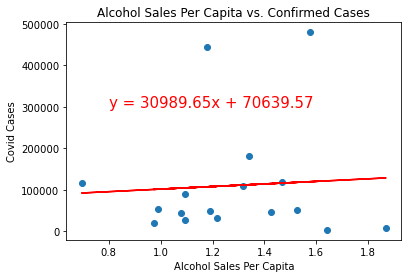

<Figure size 432x288 with 0 Axes>

In [17]:
#x and y values
x_values = final_combo['Alc PerCapita']
y_values = final_combo['Confirmed Cases']

#trend line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.8,300000),fontsize=15,color="red")

#labels
plt.title('Alcohol Sales Per Capita vs. Confirmed Cases')
plt.xlabel('Alcohol Sales Per Capita')
plt.ylabel('Covid Cases')
print(f"The r-squared is: {rvalue**2}")

#display plot
plt.show()

#save fig
plt.savefig('Plot PNGs/Alcohol Sales Per Capita vs Confirmed Cases')

The r-squared is: 0.0024879514402679


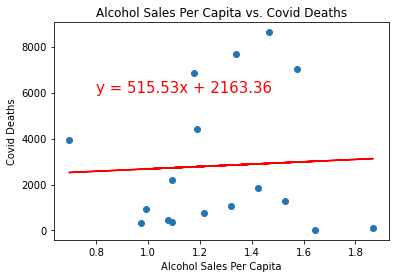

<Figure size 432x288 with 0 Axes>

In [18]:
#x and y values
x_values = final_combo['Alc PerCapita']
y_values = final_combo['Covid Deaths']

#trend line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.8,6000),fontsize=15,color="red")

#labels
plt.title('Alcohol Sales Per Capita vs. Covid Deaths')
plt.xlabel('Alcohol Sales Per Capita')
plt.ylabel('Covid Deaths')
print(f"The r-squared is: {rvalue**2}")

#display plot
plt.show()

#save fig
plt.savefig('Plot PNGs/Alcohol Sales Per Capita vs Covid Deaths')

The r-squared is: 0.01265572488339421


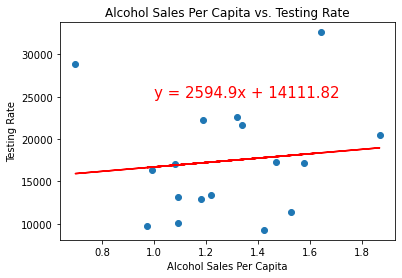

<Figure size 432x288 with 0 Axes>

In [19]:
#x and y values
x_values = final_combo['Alc PerCapita']
y_values = final_combo['Covid Testing Rate']

#trend line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 25000),fontsize=15,color="red")

#labels
plt.title('Alcohol Sales Per Capita vs. Testing Rate')
plt.xlabel('Alcohol Sales Per Capita')
plt.ylabel('Testing Rate')
print(f"The r-squared is: {rvalue**2}")

#display plot
plt.show()

#save fig
plt.savefig('Plot PNGs/Alcohol Sales Per Capita vs Testing Rate')

In [20]:
# narrow down alc df
new_alc_df = alc_df[['Year','FIPS','Gallons','Ethanol','Population','PerCapita']]

#display dataframe
new_alc_df.head()

,Year,FIPS,Gallons,Ethanol,Population,PerCapita
0,2017,2,103645,42598,593378,0.0718
1,2017,5,402885,165586,2455022,0.0674
2,2017,8,733857,301615,4634346,0.0651
3,2017,9,412100,169373,3015481,0.0562
4,2017,12,2770686,1138752,17722275,0.0643


In [21]:
#find the average percapita by year and FIPS
grouped_alc = new_alc_df.groupby(['Year','FIPS']).mean()['PerCapita']

#create dataframe
year_alc = pd.DataFrame(grouped_alc)

#display dataframe
year_alc

PerCapita
Year FIPS           
2017 12     0.072219
     17     0.062595
     2      0.076671
     20     0.075471
     21     0.054352
...              ...
2020 5      0.051400
     51     0.060711
     55     0.070807
     8      0.079083
     9      0.066089

[68 rows x 1 columns]

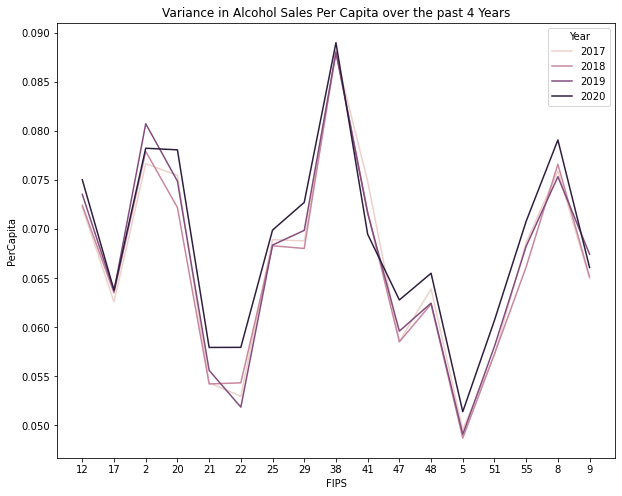

In [22]:
#plotting the above dataframe to show changes in PerCapita Alcohol Sales over past 4 years
plt.figure(figsize=(10,8))
sns.lineplot(x='FIPS', y='PerCapita',hue='Year', data=year_alc)

#label for title
plt.title('Variance in Alcohol Sales Per Capita over the past 4 Years')

#save fig
plt.savefig('Plot PNGs/Variance in Alcohol Sales Per Capita over the past 4 years')

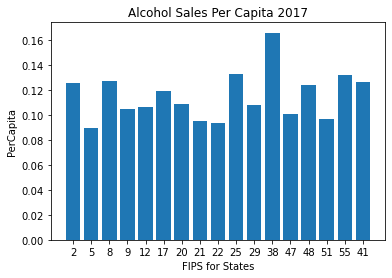

In [27]:
#2017 bar chart for gallons of ethanol per state
plt.bar(df17['FIPS'],df17['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Alcohol Sales Per Capita 2017")

#save fig
plt.savefig('Plot PNGs/Bar Chart for Alcohol Sales 2017')

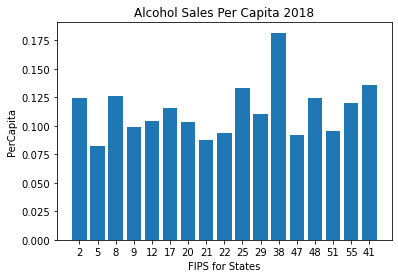

In [28]:
#2018 bar chart for gallons of ethanol per state
plt.bar(df18['FIPS'],df18['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Alcohol Sales Per Capita 2018")

#save fig
plt.savefig('Plot PNGs/Bar Chart for Alcohol Sales 2018')

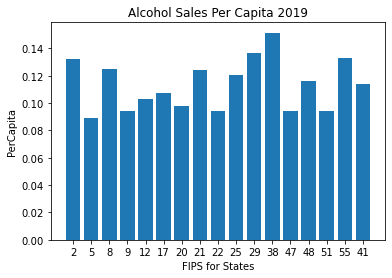

In [29]:
#2019 bar chart for gallons of ethanol per state
plt.bar(df19['FIPS'],df19['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Alcohol Sales Per Capita 2019")

#save fig
plt.savefig('Plot PNGs/Bar Chart for Alcohol Sales 2019')

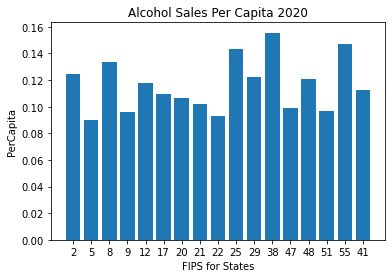

In [30]:
#2020 bar chart for gallons of ethanol per state
plt.bar(df20['FIPS'],df20['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Alcohol Sales Per Capita 2020")

#save fig
plt.savefig('Plot PNGs/Bar Chart for Alcohol Sales 2020')